## Содержание <a id="main_title"></a>

0. [Исследование объявлений о продаже квартир](#title)
1. [Изучение данных из файла](#file)
2. [Предобработка](#preprocessing)
>- [Удаление лишних столбцов](#delete) 
>- [Замена пропущенных значений](#chanching) 
>- [Изменение даты](#date)
>- [Замена типов данных](#type_change)
3. [Расчёты и добавление результатов в таблицу](#new_columns)
4. [Исследовательский анализ данных](#analyze)
>- [Первоначальная оценка](#preanalyze)
>- [Построение диаграмм(площадь, цена, число комнат, высота потолков)](#diagram)
>- [Время продажи квартиры](#sell_time)
>- [Зависимость стоимости](#price_depended)
>- [Зависимость стоимости от удаленности от центра](#price_depended_centre)
>- [Ликвидность квартир в центре](#liquid_centre)
5. [Общий вывод](#conlusion)
6. [Чек лист](#check_list)

## Исследование объявлений о продаже квартир <a id="title"></a>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

[Вернуться к содержанию](#main_title)

## Изучение данных из файла <a id="file"></a>

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from random import randint

In [161]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [162]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [163]:
df.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


In [164]:
# Проверка различных значений.
df['is_apartment'].value_counts()
df.columns
df['studio'].value_counts()
df['rooms'].value_counts()
len(df[df['airports_nearest'] == 0])
len(df[df['parks_around3000'] == 0])
df['locality_name'].value_counts()
df[df.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Вывод

1. `total_images` - число фото. в исследовании не понадобится. удалеяем
1. `last_price` - цена на момент снятия с публикации. нулей нет, пропусков нет. параметр ключевой
1. `total_area` - нулей нет, пропусков нет. параметр ключевой
1. `first_day_exposition` - дата публикации. надо привести в формат даты
1. `rooms` - есть нули, но они стоят там где либо студия, либо открытая планировка. поэтому оставляем нули. т.к. есть свободная планировка, то судя по всему есть квартиры без отделки... очень жаль что это никак не отображено в таблице, т.к. очень важный параметр для стоимости
1. `ceiling_height` высота потолков. многовато пропусков(см. вывод 1 в этом markdown)
1. `floors_total` попробуем реализовать замену пропусков по поиску аналогичных домов(расстояние аэропорт и центр питера), т.к. параметр в дальнейшим понадобится. Спойлер: идея косячная. сделал по другому
1. `living_area` жилая площадь. поставим (среднюю площадь*общую площадь)
1. `floor` - этаж 
1. `is_apartment` всег 50 значений да, есть подозрение, что в России слово аппартаменты не особ в ходу. столбец интереса не представляет. удаляем его.
1. `studio` - значений не много и есть кой какой разнобой в кол-ве комнат, где то ноль где то 1 указана, думаю правильнее заменить значения rooms = 0, а саму колонку удалить.
1. `open_plan` - такая же история как со студией, т.к. по сути является студией без отделки...
1. `kitchen_area` поставим (среднюю площадь*общую площадь)
1. `balcony` (см. вывод 2 в этом markdown)
1. `locality_name` логика как с потолками не пройдет. как правило пропущены значения расстояние до города, расстояние до центра. значение довольно много поэтому правильнее маленькие поселки сгруппировать в "другие"
1. `airports_nearest` - для каких то поселков можно заполнить значения по среднему для данного поселка, но смысла не вижу, все пропуски не удалить, такая же история со всеми данными которые завязаны на расстоянии
1. `cityCenters_nearest`
1. `parks_around3000`
1. `parks_nearest`
1. `ponds_nearest`
1. `ponds_around3000`
1. `days_exposition` - правильнее перевести в значение int... есть пропуски, возможно связано с тем что на момент выгрузки объявление было актуально...

---  

Вывод 1: была идея заполнить пропуски в высоте потолков/общем кол-ве этажей путем: найти эти дома по совпадающим расстояниям до центра/аэропорта, но пробежав глазами таблицу, пропуски могут быть и там и там... другой логики заполнения пропусков не вижу.

Вывод 2: первоначально была мысль, что люди не указывали, потому что балконов нет, но т.к. отсутствует балконы даже в квартирах 200+м то пропуски будем заполнять по такому принципу:
- ~~1.Найдем квартиру с минимальной площадью и 1 балконом. все пропуски с площадью меньше заменим нулями~~  
Данный пункт убрал т.к. обнаружил, что балконы бывают в квартирах даже 12м2(по циану)  
- 2.~~Далее разобьем площади на 10(число из головы) равных промежутков, и вставим кол-во балконов в зависимости от среднего, но т.к. балконов не может быть 0.47 , то будем вставлять рандомом)))~~  
В ходе исследования идея переигралась. см. [замена пропущенных значений](#chanching)
- а так вообще если бы не надо было менять пропуски то вообще не уверен что это нужно делать.

Вывод 3: Столбцы названы корректно, дубликатов нет

[Вернуться к содержанию](#main_title)

## Предобработка данных <a id="preprocessing"></a>

### Удаление столбцов<a id="delete"></a>

In [165]:
# Функция для расстановки корректной расстановки кол-ва комнат
def check_studio(row):
    if row['studio'] or row['open_plan']:
        return 0
    else:
        return row['rooms']


# Код для проверки работоспособности функции:
columns_name = ['rooms', 'studio', 'open_plan']
data = [[1, True, False],
        [2, False, False],
        [3, False, True],
        [4, True, True],
        [5, False, False],
        [6, False, False],
        [0, False, False],
        [0, False, True]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['rooms'] = test_df.apply(check_studio, axis=1)
test_df

,rooms,studio,open_plan
0,0,True,False
1,2,False,False
2,0,False,True
3,0,True,True
4,5,False,False
5,6,False,False
6,0,False,False
7,0,False,True


In [166]:
df['rooms'] = df.apply(check_studio, axis=1)
df.drop(columns=['studio', 'open_plan', 'total_images', 'is_apartment'], inplace=True)

[Вернуться к содержанию](#main_title)

### Замена пропущенных значений <a id="chanching"></a>

In [167]:
# Убираем единственный дурацкий ноль в расстоянии до аэропорта
df['airports_nearest'] = df['airports_nearest'].replace(0, None)

In [168]:
# Нашли минимальный площадь квартиры с балконом
df[df['balcony']==1]['total_area'].min()

18.0

In [169]:
# Разбили площади на категории
df['balcony_category'] = pd.qcut(df['total_area'], q=10)

In [170]:
# Делаем две таблицы, 
# Первую со средним значением кол-во балконов если расставить нули в пропусках, 
# Вторую: если пропуски оставляем
df_balcony_zero = df.copy()
df_balcony_zero['balcony'] = df_balcony_zero['balcony'].fillna(0)
df_balcony_category_without_zero = df.pivot_table(
    index=['balcony_category'], aggfunc='mean', values='balcony')
df_balcony_category_zero = df_balcony_zero.pivot_table(
    index=['balcony_category'], aggfunc='mean', values='balcony')
df_balcony_category_zero['without_zero'] = df_balcony_category_without_zero['balcony']
df_balcony_category_zero


,balcony,without_zero
balcony_category,,
"(11.999, 33.0]",0.390282,0.833473
"(33.0, 37.6]",0.614687,1.128120
"(37.6, 42.0]",0.617794,1.145624
"(42.0, 46.0]",0.505239,0.981161
"(46.0, 52.0]",0.566487,1.073191
"(52.0, 58.0]",0.661414,1.235481
"(58.0, 64.8]",0.662298,1.233523
"(64.8, 75.0]",0.681235,1.313998
"(75.0, 93.52]",0.668301,1.341987


Ситуация не очень понятная что с пропусками... судя по кол-ву балконов при малых площадях больше похоже что пропуски возникают потому что при отсутствии балкона просто ничего не ставят, но вот квартиры от 93 метров практически половина "без балконов"... 
Наверно стоит переиграть первоначальную идею... просто заполнить нулями

In [171]:
df['balcony'] = df['balcony'].fillna(0) # Заполняем пропуски
df.drop(columns='balcony_category', inplace=True)  # Удаляем столбец, чтоб глаза не мазолил

In [172]:
# Создаем колонку, в которой кортеж Расстояние аэропорт/ Расстояние до центра
def distance_split(row):
    return (row['airports_nearest'], row['cityCenters_nearest'])


df['distance_for_floors'] = df.apply(distance_split, axis=1)


In [173]:
data_group = df.pivot_table(index=['distance_for_floors'], values=['floors_total'])

# Идея провальная... на одном расстоянии находятся дома с разным количеством этажей. чудеса.
# Переигрываем идею... так как данные нужны для первого/последнего этажа. то находим сколько % занимает верхние этажи из имеющихся данных
# И с таким же процентом добавляем этажи относительно имеющегося.
# Хотя пропусков на самом деле всего то 86, можно было и просто удалить...)

In [174]:
df.drop(columns='distance_for_floors', inplace=True) # Удаляем стобец который оказался не нужным
test_df = df.copy() # Копируем дф, чтою посмотреть что будет показывать без пропусков 
test_df.dropna(subset=['floors_total'], inplace=True)
test_df['floors_total'] = test_df['floors_total'].astype(int)
test_df['floor'] = test_df['floor'].astype(int)
len(test_df[df['floor'] == df['floors_total']])

C:\Users\Bacek\AppData\Local\Temp/ipykernel_22100/1793015234.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(test_df[df['floor'] == df['floors_total']])


3361

In [175]:
# Функция которая принимает строку df, если отсутствует значение общего кол-ва высоты здания, то с шансом соответствующим
# проценту последних этажей возвращает такое же количество этажей сколько в зданий, в противном случае прибавляет от одного до 5 этажей,
# можно было поставить сколько угодно, т.к. только именно факт последнего этажа играет в нашем ислледовании

def check_floor(row):
    if pd.notna(row['floors_total']):
        return row['floors_total']
    if random() > 3361/23613:
        return row['floor'] + randint(1,5)
    return row['floor']

# Проверка работспособности функции
columns_name = ['floor', 'floors_total']
data = [[1, 22],
        [2, 22],
        [3, 22],
        [4, None],
        [5, None],
        [6, 22],
        [1, None],
        [1, None]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['floors_total'] = test_df.apply(check_floor, axis=1)
df['floors_total'] = df.apply(check_floor, axis=1)

[Вернуться к содержанию](#main_title)

### Изменение даты <a id="date"></a>

In [176]:
# Сначало переводим формат obj в формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1d')

[Вернуться к содержанию](#main_title)

### Замена типов данных <a id='type_change'></a>

Так как по большой части пропуски было решено оставить, то изменение типа не приведет ни к чему, останется тот же float  
Один из немногих пунктов который можно исправить: `balcony`

In [177]:
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
# df.info()

[Вернуться к содержанию](#main_title)

## Расчёты и добавление результатов в таблицу <a id="new_columns"></a>

In [178]:
# Добавляем цену квадратного метра
df['price_one_metr'] = df['last_price']/df['total_area']
# Добавляем день недели
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [179]:
# переименовываем в человеческий вид сразу
weekdays = {
    0 : 'понедельник',
    1 : 'вторник',
    2 : 'среда',
    3 : 'четверг',
    4 : 'пятница',
    5 : 'суббота',
    6 : 'воскресенье'
}
df['weekday_names'] = df['weekday'].map(weekdays)

In [180]:
# Функция для категоризации этажей
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Заключительный'
    return 'Другой'

# Проверка работоспособности функции
columns_name = ['floor','floors_total']
data=[
    [1,14],
    [22,25],
    [13,13]
]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['category_floor'] = test_df.apply(floor_type, axis=1)
# test_df


In [181]:
df['category_floor'] = df.apply(floor_type, axis=1)

In [182]:
# Так как оставили пропуски в жилой площади и площади кухни, то высчитать простыи деленим соотношение нельзя
# Пишем соответствующую функцию
def function_closser(value):
    value = value
    def function_inside(row):
        nonlocal value
        if pd.isna(row[value]):
            return None
        return row[value] / row['total_area']
    return function_inside
  
kitchen = function_closser('kitchen_area')
living = function_closser('living_area')

# Проверка работоспособности функции
columns_name = ['total_area','kitchen_area','living_area']
data = [
    [100.0, 20, 30],
    [100, None, None],
    [100, None, 15.0],
    [100.0, 15.2, 16.2],
    [100.0, 14, None]
]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['kitch'] = test_df.apply(kitchen, axis=1)
test_df['liv'] = test_df.apply(living, axis=1)
test_df

,total_area,kitchen_area,living_area,kitch,liv
0,100.0,20.0,30.0,0.200,0.300
1,100.0,NaN,NaN,NaN,NaN
2,100.0,NaN,15.0,NaN,0.150
3,100.0,15.2,16.2,0.152,0.162
4,100.0,14.0,NaN,0.140,NaN


In [183]:
df['living_balance'] = df.apply(living, axis=1)
df['kitchen_balance'] = df.apply(kitchen, axis=1)

[Вернуться к содержанию](#main_title)

## Исследовательский анализ данных <a id="analyze"></a>

### Первоначальная оценка <a id='preanalyze'></a>

In [184]:
# Буду рад подсказки как вывести иначе describe на определенные столбцы
pivot = df['total_area'].describe()
for name in ['rooms', 'last_price', 'ceiling_height']:
    pivot = pd.concat([pivot, df[name].describe()],axis=1)
pivot

,total_area,rooms,last_price,ceiling_height
count,23699.000000,23699.000000,2.369900e+04,14504.000000
mean,60.348651,2.069328,6.541549e+06,2.771499
std,35.654083,1.079409,1.088701e+07,1.261056
min,12.000000,0.000000,1.219000e+04,1.000000
25%,40.000000,1.000000,3.400000e+06,2.520000
50%,52.000000,2.000000,4.650000e+06,2.650000
75%,69.900000,3.000000,6.800000e+06,2.800000
max,900.000000,19.000000,7.630000e+08,100.000000


Смотрим на столбцы внимательно и понимаем, что минимальная стоимость квартиры 12190... значение уникальное. стоит его удалить. 
Также проблема с высотами потолков надо заменить значение свыше 7.5 метров на None и менее 2метров.
19 комнат в квартире 370метров... поверим, может ранее была коммуналка

In [185]:
df = df.query('last_price > 13000' )

In [186]:
def check_height(row):
    if row < 7.5 and row > 2:
        return row

# Проверка работоспособности функции:
columns_name = ['ceiling_height', 'rooms']
data = [[None, 1], [1.2, 4], [3, 2], [5, 2], [8,3]]
test_df = pd.DataFrame(data=data, columns=columns_name)
test_df['ceiling_height'] = test_df['ceiling_height'].apply(check_height)
# test_df

In [187]:
df['ceiling_height'] = df['ceiling_height'].apply(check_height)

[Вернуться к содержанию](#main_title)

### Построение гистограмм <a id='diagram'></a> (площадь, цена, число комнат, высота потолков)

In [188]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

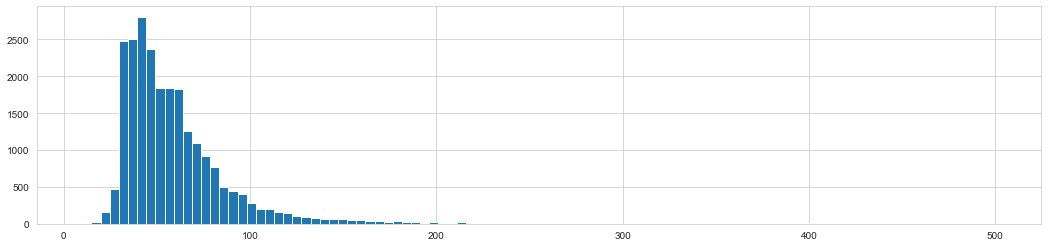

In [189]:
df['total_area'].hist(bins=100, range=(10, 500),figsize=(18,4))

<AxesSubplot:>

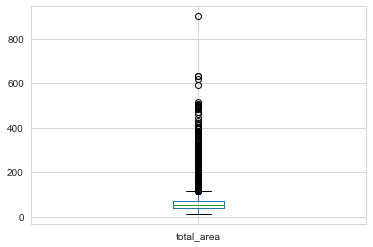

In [190]:
df.boxplot('total_area')

In [191]:
# видим бяку. прикидываем нормальные значеня и чистим по ним
normal_value_area = (69.875 - 40.0)*1.5 + 69.875
df = df.query('total_area <= @normal_value_area')

In [192]:
df['rooms'].value_counts()

1    8027
2    7901
3    5442
4     792
0     214
5      72
6       9
7       1
Name: rooms, dtype: int64

In [193]:
df = df.query('rooms <= 5')

<AxesSubplot:>

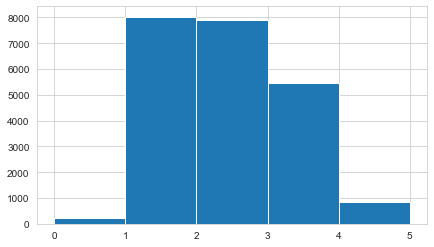

In [194]:
df['rooms'].hist(bins=5, range=(0, 5), figsize=(7, 4))

<AxesSubplot:>

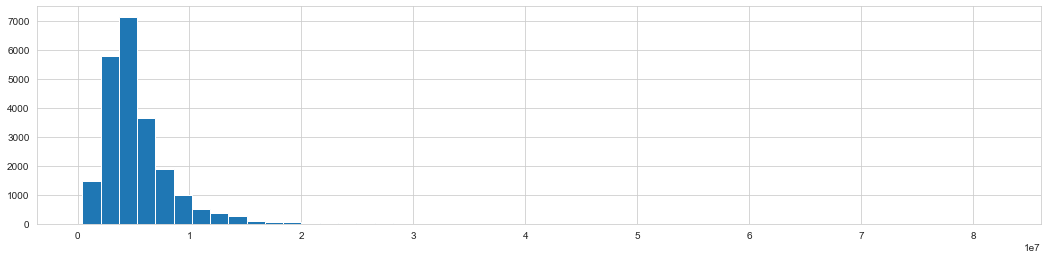

In [195]:
df['last_price'].hist(bins=50,figsize=(18,4))

In [196]:
df['last_price'].describe()
max_normal_price = (6300000 - 3355000)*1.5 + 6300000
df = df.query('last_price <= @max_normal_price')

<AxesSubplot:>

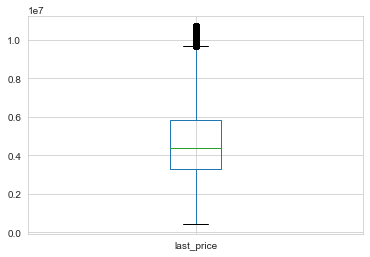

In [197]:
df.boxplot('last_price')  # Boxplot выглядит хорошо. выбросы уже почистили


In [198]:
df['ceiling_height'].describe()

count    12701.000000
mean         2.680857
std          0.225698
min          2.200000
25%          2.500000
50%          2.600000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

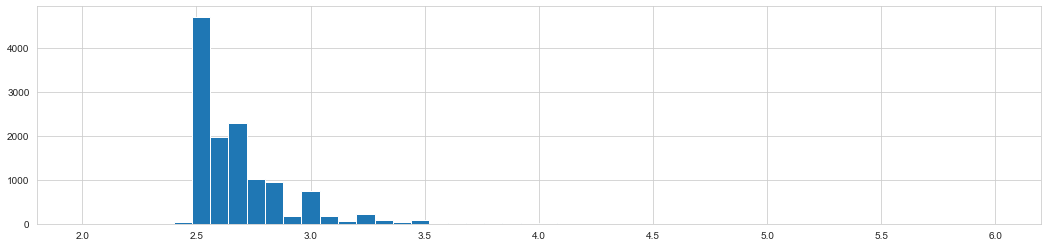

In [199]:
df['ceiling_height'].hist(bins=50,figsize=(18,4), range=(2, 6))

In [200]:
# Тут удалять 1.5 межквартильного размаха не хочется... оставим до 4 метров выборку(В Питере все таки попадаются старые дома с высокими полками)
df = df.query('ceiling_height <= 4')

[Вернуться к содержанию](#main_title)

### Время продажи квартиры <a id='sell_time'></a>

<AxesSubplot:>

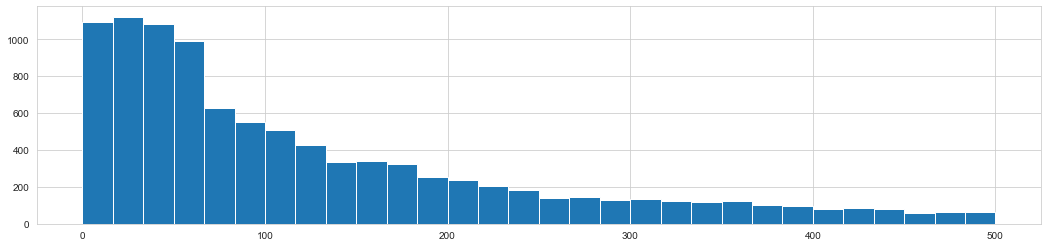

In [201]:
df['days_exposition'].hist(figsize=(18,4),bins=30, range=(0,500))

In [202]:
df['days_exposition'].describe()

count    10729.000000
mean       178.863454
std        216.318840
min          1.000000
25%         43.000000
50%         96.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

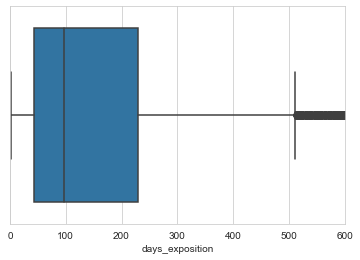

In [203]:
sns.boxplot(x=df['days_exposition'])
plt.xlim(0,600)
plt.show()

**Промежуточный вывод**  
Медианное время продажи квартиры 95 дней, свыше 230 дней можно считать долгим. Время продажи свыше 500 дней - очень долго... 
продажи которые прошли менее чем за полтора месяца : можно считать быстрыми.

In [204]:
df.reset_index(drop=True, inplace=True)  # Обновил индексы... ну так чтоб красиво было.

[Вернуться к содержанию](#main_title)

### Зависимость стоимости <a id='price_depended'></a>

In [205]:
df[['total_area','price_one_metr','rooms','cityCenters_nearest']].corr()

,total_area,price_one_metr,rooms,cityCenters_nearest
total_area,1.000000,-0.131745,0.806707,-0.114225
price_one_metr,-0.131745,1.000000,-0.261739,-0.388102
rooms,0.806707,-0.261739,1.000000,-0.063593
cityCenters_nearest,-0.114225,-0.388102,-0.063593,1.000000


<AxesSubplot:xlabel='rooms', ylabel='price_one_metr'>

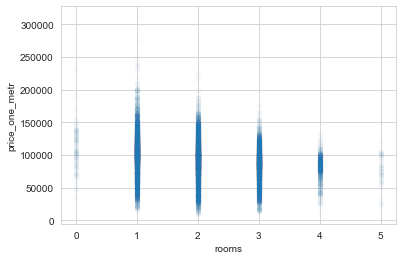

In [206]:
df.plot(y='price_one_metr', x='rooms', kind='scatter', alpha=0.02)

<AxesSubplot:xlabel='rooms', ylabel='price_one_metr'>

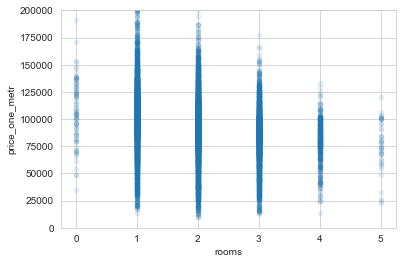

In [207]:
df.plot(y='price_one_metr', x='rooms', kind='scatter', alpha=0.1, ylim=(00000,200000))

<AxesSubplot:xlabel='total_area', ylabel='price_one_metr'>

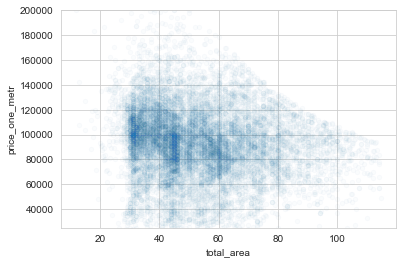

In [208]:
df.plot(y='price_one_metr', x='total_area', kind='scatter', alpha=0.02, ylim=(25000,200000))

Вообщем корреляция Пирсона дает более понятный ответ, зависимость между кол-вом комнат и стоимостью есть, но не сильная. (студии подороже чем квартира разбитая на большое кол-во комнат)
Ну также ооочень слабая зависимость видна: что маленькие квартиры в среднем имеют более дорогую стоимость за кв.м., связанно скорее всего с ликвидностью такого жилья.

In [209]:
df = pd.get_dummies(df, columns=['category_floor'])  # Делаем столбцы с разными категориями этажности для анализа
df[['category_floor_Первый',
    'category_floor_Другой', 'category_floor_Заключительный']].corrwith(df.price_one_metr)

category_floor_Первый           -0.162907
category_floor_Другой            0.213975
category_floor_Заключительный   -0.114863
dtype: float64

Корреляция прослеживается, стоимость вполне адекватно распределилась сначала первые этажи(дешевые) -> последний() -> другие

In [210]:
df[['weekday', 'month', 'year']].corrwith(df.price_one_metr)

weekday   -0.014222
month     -0.012263
year       0.105501
dtype: float64

Зависимости от даты и месяца публикации корреляция не особ прослеживается. а вот тендеция увеличения стоимсоти из года в год прослеживается.

In [211]:
# Группируем по поселкам(взяли медианное значение стоимости)
df_local = df.pivot_table(
    index=['locality_name'], values='price_one_metr', aggfunc=['count', 'median'])
df_local.columns = ['count', 'median']
# Выбираем 10 поселков с наибольшим кол-вом данных
df_local = df_local.sort_values(by='count', ascending=False).head(10)
# Сортируем по медианной стоимости за кв.м
df_local.sort_values(by='median', ascending=False)


,count,median
locality_name,,
Санкт-Петербург,8405,102040.816327
Пушкин,209,98214.285714
деревня Кудрово,122,91292.031791
посёлок Парголово,137,91040.462428
посёлок Мурино,198,86157.557209
Петергоф,138,81901.425762
посёлок Шушары,215,77735.849057
Колпино,201,74725.274725
Гатчина,146,68979.744936


[Вернуться к содержанию](#main_title)

### Зависимость стоимости от удалености к центру <a id='price_depended_centre'></a>

In [212]:
df_centre = df.query("locality_name == 'Санкт-Петербург'").dropna(subset=['cityCenters_nearest'])
df_centre['kilometers_to_centre'] = df_centre['cityCenters_nearest'].apply(lambda x: int(x/1000)) 
df_centre = df_centre.pivot_table(index='kilometers_to_centre', values='price_one_metr', aggfunc=['count','mean','median'])
df_centre.columns = ['count','mean','median']
df_centre[['mean','median']] = df_centre[['mean','median']].astype(int)

Видим что среднее от медианы не сильно отличается, разницы принципиальной нет по какому значению строить график

<AxesSubplot:xlabel='kilometers_to_centre', ylabel='mean'>

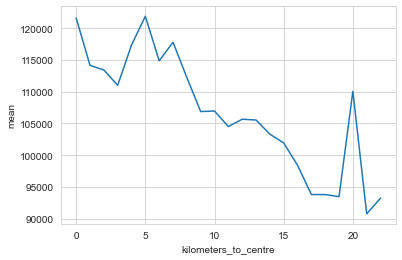

In [213]:
sns.set_style('whitegrid')
sns.lineplot(data=df_centre.query('kilometers_to_centre < 23'), y='mean', x='kilometers_to_centre')

По графику видно, что чем ближе к центру, тем цена выше, довольно отчетливо видно, что максимальнай цена примерно до 7-8км от центра(по данным янд.недвижемости), далее цена медленно понижаться. есть всплеск в 20км, скорее всего это какое то элитное жилье, аля "Рублёвка" в экологически чистом районе.

In [214]:
df.query('cityCenters_nearest <= 7500')[['total_area', 'price_one_metr','rooms','ceiling_height']].describe()


,total_area,price_one_metr,rooms,ceiling_height
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,64.052370,116644.515883,2.303681,3.000590
std,20.641947,28820.602806,0.974637,0.317335
min,12.000000,17391.304348,0.000000,2.400000
25%,48.000000,95535.991312,2.000000,2.750000
50%,62.950000,111412.264025,2.000000,3.000000
75%,78.000000,133345.752608,3.000000,3.200000
max,114.000000,240000.040000,5.000000,4.000000


<AxesSubplot:>

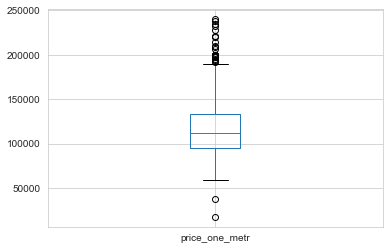

In [215]:
df.query('cityCenters_nearest <= 7500').boxplot('price_one_metr')

In [216]:
# Отбросим выбросы
df.query('cityCenters_nearest <= 7500 and price_one_metr >= 60000 and price_one_metr <=190000')[
    ['total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corrwith(df.price_one_metr)



total_area            -0.576615
rooms                 -0.562754
ceiling_height        -0.114210
cityCenters_nearest    0.093773
dtype: float64

Очень интересно... получается в маленьких квартирах стоимость за 1кв.м дороже, чем в большой квартире. и странно что практически отсутствует корреляция с высотой потолка и вообще она обратная: выше потолок - меньше стоимость. удаленности от центра на таком расстояние не сильно влияет на стоимость. Хотя если сделать выборку по удаленности менее 4500 метров - то там корреляция будет отрицательная.

[Вернуться к содержанию](#main_title)

### Ликвидность квартир в центре <a id='liquid_centre'></a>

In [219]:
df_centre_liquid = df.query('cityCenters_nearest <= 7500 and price_one_metr >= 60000 and price_one_metr <=190000')
df_centre_liquid['total_area_category'] = pd.qcut(df_centre_liquid['total_area'], q=10)

C:\Users\Bacek\AppData\Local\Temp/ipykernel_22100/2369678646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centre_liquid['total_area_category'] = pd.qcut(df_centre_liquid['total_area'], q=10)


(45.98, 51.0]     133
(75.0, 83.0]      131
(12.999, 39.0]    129
(69.28, 75.0]     128
(94.0, 114.0]     127
(39.0, 45.98]     126
(51.0, 57.5]      126
(63.3, 69.28]     126
(57.5, 63.3]      125
(83.0, 94.0]      124
Name: total_area_category, dtype: int64

In [221]:
df_pivot_liquid = df_centre_liquid.pivot_table(
    index=['total_area_category'], values=['price_one_metr','days_exposition'], aggfunc=['mean', 'median'])
df_pivot_liquid


mean                         median  \
                    days_exposition price_one_metr days_exposition   
total_area_category                                                  
(12.999, 39.0]            97.926606  136367.876094            60.0   
(39.0, 45.98]            209.732759  134592.437549           108.0   
(45.98, 51.0]            226.413223  126073.495592           118.0   
(51.0, 57.5]             141.733333  120944.409387            91.0   
(57.5, 63.3]             210.141414  119920.613564            97.0   
(63.3, 69.28]            271.615385  115347.628782           164.5   
(69.28, 75.0]            259.682692  108227.978536           160.5   
(75.0, 83.0]             226.504505  102991.691110           152.0   
(83.0, 94.0]             261.223301   95199.775003           191.0   
(94.0, 114.0]            330.361905   90404.537458           252.0   

                                    
                    price_one_metr  
total_area_category                 
(12.999, 39.0]       134975.369458  
(39.0, 45.98]        130266.921909  
(45.98, 51.0]        123203.285421  
(51.0, 57.5]         118979.416810  
(57.5, 63.3]         120000.000000  
(63.3, 69.28]        108337.607448  
(69.28, 75.0]        107316.546930  
(75.0, 83.0]         101965.601966  
(83.0, 94.0]          95212.170855  
(94.0, 114.0]         92205.128205

In [3]:
test = [0, 2, 5.3, None, 7]
list(map(lambda x: None if x == 0 else x, test))

[None, 2, 5.3, None, 7]

[Вернуться к содержанию](#main_title)

## Общий вывод <a id="conlusion"></a>

Изучив данные можно сделать следующие выводы: 
1. Отсутствуют некоторые важные параметры для определения стоимости(во первых состояние квартиры)
2. Квартиры низкой площади более ликвидны (видно что и быстрее продаются и стоимость за квадратный метр больше)
3. Выделен центр - примерно 7500метров (по данным яндексНедвижисоти)
4. Средняя стоимость даже в самой дорогом городе Лен.области(г.Пушкин) не превышает средней стоимости жилья в Санкт-Петербурге
5. Таблица почищена...
6. Зависимости от месяца и дня недели не наблюдается, однако наблюдает небольшая зависимоть: больше год - больше стоимость
7. Этажность квартиры влияет. Вообщем не зря на популярных сервисах продажи недвижимости есть фильтры ("не первый", "не заключительный")
8. Разбивка квартиры на большое кол-во комнат - плохое капитоловложение
9. Странно корреляция между высотой потолкой и стоимостью не особ прослеживается.

[Вернуться к содержанию](#main_title)

## Чек-лист готовности проекта <a id="check_list"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [х]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [х]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [х]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили." (сделано при изучении площади,цены, числа комнат,высот потолков)
- [х]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [х]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [х]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [х]  в каждом этапе есть выводы
- [х]  есть общий вывод

[Вернуться к содержанию](#main_title)